In [1]:
import zarr
from scipy.spatial.distance import squareform
import numpy as np
import anjl
import pandas as pd
import plotly.express as px

## Small

In [2]:
small = zarr.load("../data/small/dist.zarr.zip")
small_D = squareform(small)
small_D.shape

(181, 181)

In [3]:
small_Z = anjl.canonical_nj(small_D)

In [4]:
small_Z_r = anjl.rapid_nj(small_D)

rapid_nj v5


In [5]:
%%timeit -r20 -n1
anjl.canonical_nj(small_D)

4.13 ms ± 437 μs per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [6]:
%%timeit -r20 -n1
anjl.rapid_nj(small_D)

rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
10.1 ms ± 1.78 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [7]:
%%timeit -r20 -n1
anjl.rapid_nj(small_D, gc=None)

rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
9.42 ms ± 1.15 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


## Medium

In [8]:
medium = zarr.load("../data/medium/dist.zarr.zip")
medium_D = squareform(medium)
medium_D.shape

(472, 472)

In [9]:
medium_Z = anjl.canonical_nj(medium_D)

In [10]:
medium_Z_r = anjl.rapid_nj(medium_D)

rapid_nj v5


In [11]:
%%timeit -r20 -n1
anjl.canonical_nj(medium_D)

54.3 ms ± 3.74 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [12]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D)

rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
81.4 ms ± 7.93 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [13]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D, gc=10)

rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
70.3 ms ± 6.02 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [14]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D, gc=None)

rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
84 ms ± 6.43 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [15]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D, gc=1)

rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
rapid_nj v5
158 ms ± 29.6 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


## Large

In [16]:
large = zarr.load("../data/large/dist.zarr.zip")
large_D = squareform(large)
large_D.shape

(3081, 3081)

In [17]:
large_D

array([[ 0.,  9., 16., ..., 26., 27., 26.],
       [ 9.,  0., 17., ..., 23., 24., 23.],
       [16., 17.,  0., ..., 28., 31., 28.],
       ...,
       [26., 23., 28., ...,  0., 13.,  0.],
       [27., 24., 31., ..., 13.,  0., 13.],
       [26., 23., 28., ...,  0., 13.,  0.]], dtype=float32)

In [18]:
shuffle = np.random.choice(large_D.shape[0], size=large_D.shape[0], replace=False)
shuffle

array([2376, 2094, 3054, ..., 1018, 2926, 2575])

In [19]:
large_D_shuffled = large_D.take(shuffle, axis=0).take(shuffle, axis=1)
large_D_shuffled

array([[ 0., 13., 19., ..., 15., 16., 21.],
       [13.,  0., 30., ..., 24., 27., 30.],
       [19., 30.,  0., ..., 20.,  9., 22.],
       ...,
       [15., 24., 20., ...,  0., 17., 18.],
       [16., 27.,  9., ..., 17.,  0., 19.],
       [21., 30., 22., ..., 18., 19.,  0.]], dtype=float32)

In [20]:
large_Z, timings_canonical, searched_canonical = anjl.canonical_nj(
    large_D_shuffled,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
)

In [21]:
large_Z, timings_rapid_gc100, searched_rapid_gc100 = anjl.rapid_nj(
    large_D_shuffled,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
    gc=100,
)

rapid_nj v5


In [27]:
large_Z, timings_rapid_initrow, searched_rapid_initrow = anjl.rapid_nj(
    large_D_shuffled,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
    gc=100,
    init="rowcache",
)

rapid_nj v5


In [29]:
large_Z, timings_rapid_initcol, searched_rapid_initcol = anjl.rapid_nj(
    large_D_shuffled,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
    gc=100,
    init="firstval",
)

rapid_nj v5


In [30]:
large_Z, timings_rapid_nogc, searched_rapid_nogc = anjl.rapid_nj(
    large_D_shuffled,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
    gc=None,
)

rapid_nj v5


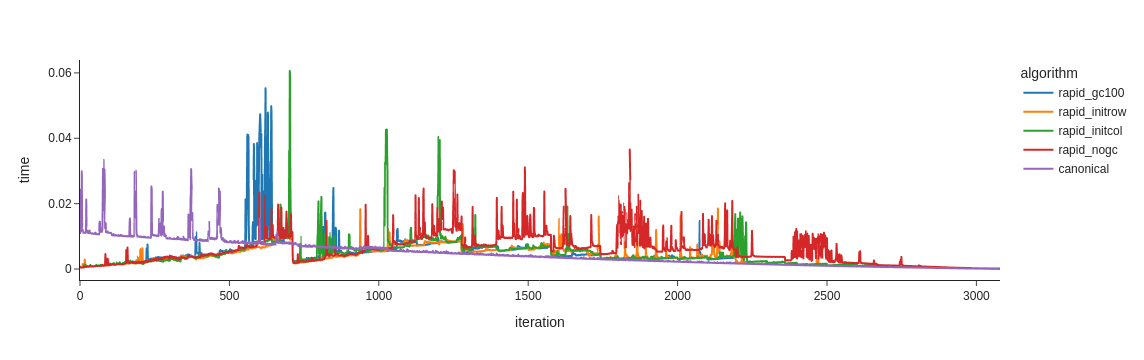

In [31]:
df_canonical = pd.DataFrame(
    {
        "time": timings_canonical,
        "searched": searched_canonical,
        "iteration": np.arange(len(timings_canonical)),
        "algorithm": "canonical",
    }
)
df_rapid_gc100 = pd.DataFrame(
    {
        "time": timings_rapid_gc100,
        "searched": searched_rapid_gc100,
        "iteration": np.arange(len(timings_rapid_gc100)),
        "algorithm": "rapid_gc100",
    }
)
df_rapid_nogc = pd.DataFrame(
    {
        "time": timings_rapid_nogc,
        "searched": searched_rapid_nogc,
        "iteration": np.arange(len(timings_rapid_nogc)),
        "algorithm": "rapid_nogc",
    }
)
df_rapid_initrow = pd.DataFrame(
    {
        "time": timings_rapid_initrow,
        "searched": searched_rapid_initrow,
        "iteration": np.arange(len(timings_rapid_initrow)),
        "algorithm": "rapid_initrow",
    }
)
df_rapid_initcol = pd.DataFrame(
    {
        "time": timings_rapid_initcol,
        "searched": searched_rapid_initcol,
        "iteration": np.arange(len(timings_rapid_initcol)),
        "algorithm": "rapid_initcol",
    }
)
px.line(
    pd.concat(
        [
            df_rapid_gc100,
            df_rapid_initrow,
            df_rapid_initcol,
            df_rapid_nogc,
            df_canonical,
        ],
        axis=0,
    ),
    x="iteration",
    y="time",
    color="algorithm",
    template="simple_white",
)

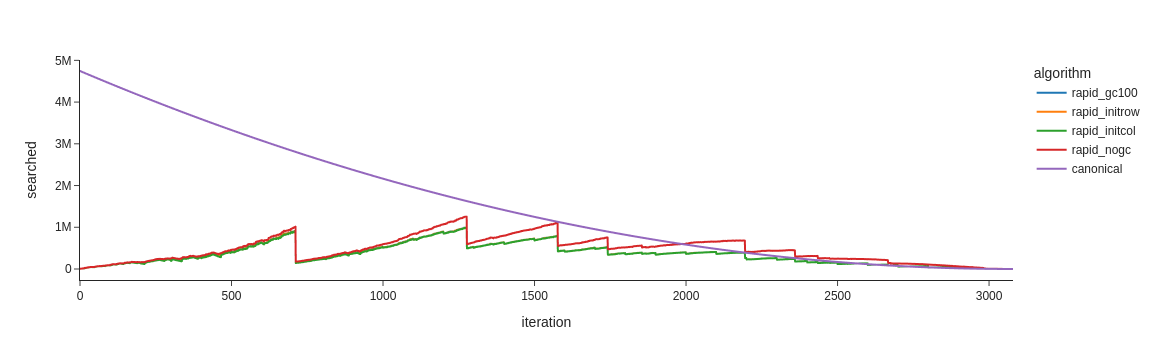

In [32]:
px.line(
    pd.concat(
        [
            df_rapid_gc100,
            df_rapid_initrow,
            df_rapid_initcol,
            df_rapid_nogc,
            df_canonical,
        ],
        axis=0,
    ),
    x="iteration",
    y="searched",
    color="algorithm",
    template="simple_white",
)

In [25]:
%%timeit -r2 -n1
anjl.canonical_nj(large_D)

10.9 s ± 667 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [26]:
%%timeit -r2 -n1
anjl.rapid_nj(large_D, gc=50)

rapid_nj v2
rapid_nj v2
11.3 s ± 21.9 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [27]:
%%timeit -r2 -n1
anjl.rapid_nj(large_D, gc=100)

rapid_nj v2
rapid_nj v2
12.3 s ± 220 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [30]:
%%timeit -r2 -n1
anjl.rapid_nj(large_D, gc=200)

rapid_nj v2
rapid_nj v2
11.7 s ± 409 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [28]:
%%timeit -r2 -n1
anjl.rapid_nj(large_D, gc=None)

rapid_nj v2
rapid_nj v2
13.7 s ± 160 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [29]:
%%timeit -r10 -n1
np.argsort(large_D_shuffled, axis=1)

199 ms ± 8.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
